In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv('diabetes_dataset.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [32]:
# X = df["Age"]
X = df.iloc[:, 0].values.reshape(-1, 1)
X

array([[ 6],
       [ 1],
       [ 8],
       [ 1],
       [ 0],
       [ 5],
       [ 3],
       [10],
       [ 2],
       [ 8],
       [ 4],
       [10],
       [10],
       [ 1],
       [ 5],
       [ 7],
       [ 0],
       [ 7],
       [ 1],
       [ 1],
       [ 3],
       [ 8],
       [ 7],
       [ 9],
       [11],
       [10],
       [ 7],
       [ 1],
       [13],
       [ 5],
       [ 5],
       [ 3],
       [ 3],
       [ 6],
       [10],
       [ 4],
       [11],
       [ 9],
       [ 2],
       [ 4],
       [ 3],
       [ 7],
       [ 7],
       [ 9],
       [ 7],
       [ 0],
       [ 1],
       [ 2],
       [ 7],
       [ 7],
       [ 1],
       [ 1],
       [ 5],
       [ 8],
       [ 7],
       [ 1],
       [ 7],
       [ 0],
       [ 0],
       [ 0],
       [ 2],
       [ 8],
       [ 5],
       [ 2],
       [ 7],
       [ 5],
       [ 0],
       [ 2],
       [ 1],
       [ 4],
       [ 2],
       [ 5],
       [13],
       [ 4],
       [ 1],
       [ 1],
       [ 7],

In [33]:
y = df.iloc[:, 4].astype(int)
y

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int32

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [35]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred=regressor.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: -0.08930965597525198


[Text(0.34782608695652173, 0.9375, 'x[0] <= 3.5\nsquared_error = 14040.029\nsamples = 537\nvalue = 84.901'),
 Text(0.08695652173913043, 0.8125, 'x[0] <= 0.5\nsquared_error = 12996.853\nsamples = 298\nvalue = 95.181'),
 Text(0.043478260869565216, 0.6875, 'squared_error = 11193.332\nsamples = 81\nvalue = 83.432'),
 Text(0.13043478260869565, 0.6875, 'x[0] <= 1.5\nsquared_error = 13599.296\nsamples = 217\nvalue = 99.567'),
 Text(0.08695652173913043, 0.5625, 'squared_error = 16711.648\nsamples = 91\nvalue = 113.593'),
 Text(0.17391304347826086, 0.5625, 'x[0] <= 2.5\nsquared_error = 11106.77\nsamples = 126\nvalue = 89.437'),
 Text(0.13043478260869565, 0.4375, 'squared_error = 11405.756\nsamples = 72\nvalue = 86.222'),
 Text(0.21739130434782608, 0.4375, 'squared_error = 10675.978\nsamples = 54\nvalue = 93.722'),
 Text(0.6086956521739131, 0.8125, 'x[0] <= 8.5\nsquared_error = 15044.671\nsamples = 239\nvalue = 72.084'),
 Text(0.43478260869565216, 0.6875, 'x[0] <= 6.5\nsquared_error = 17607.978\

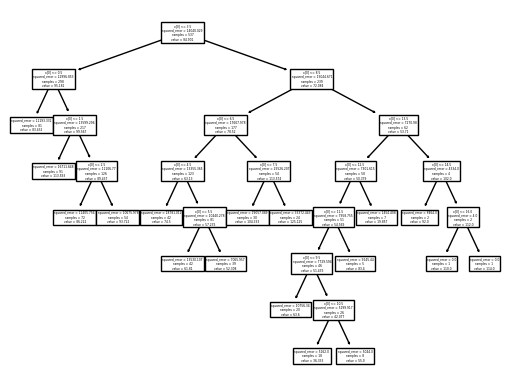

In [37]:
from sklearn import tree
tree.plot_tree(regressor)

In [38]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='tree.dot', feature_names=['Age'])

In [39]:
age_to_predict = 35

age_to_predict_reshaped = [[age_to_predict]]

predicted_value = regressor.predict(age_to_predict_reshaped)

print("Predicted value for age {}: {}".format(age_to_predict, predicted_value))

Predicted value for age 35: [114.]
